In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import *

In [2]:
import pandas as pd

test = pd.read_csv('test.csv', delimiter = ',')
train = pd.read_csv('train.csv', delimiter = ',')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [8]:
a =train['Sex'].copy()
b=[]
for i in range(len(a)):
    if a[i] == 'male':
        b.append(0)
    else:
        b.append(1)


In [9]:
train['Sex'].value_counts().to_dict()

{'male': 577, 'female': 314}

In [10]:
train['Sex_num'] = pd.DataFrame(b)

In [11]:
# 속성들과 생존 상관관계 비교.
pca = PCA(n_components =2 )
x = train.loc[:,['Pclass', 'SibSp', 'Parch','Fare','Sex_num']]
y = train['Survived']

In [12]:
pca.fit(x,y)
pca.components_

array([[-0.00924606,  0.00354423,  0.00350817,  0.99994328,  0.0017541 ],
       [ 0.19777239,  0.88335265,  0.42056336, -0.00288435,  0.06076446]])

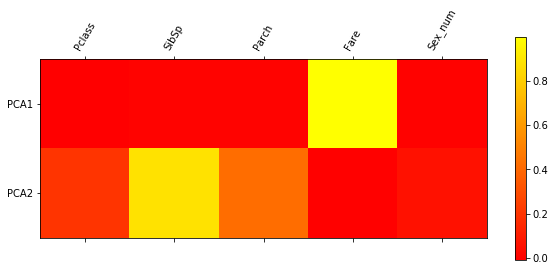

In [13]:
plt.matshow(pca.components_, interpolation='none', cmap='autumn',
            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar()
plt.xticks(range(5), x, rotation=60)
print('')

In [14]:
#정규화
x2 = (x - x.min(axis=0))/ x.std(axis=0)
pca.fit(x2,y)
pca.components_
pca.transform(x2)

array([[-0.97720802,  0.61569477],
       [ 1.57098412, -1.09413876],
       [-0.47862595,  0.31595963],
       ...,
       [ 1.17424952,  1.86069859],
       [-0.0635533 , -1.47621387],
       [-1.30525526,  0.13061189]])

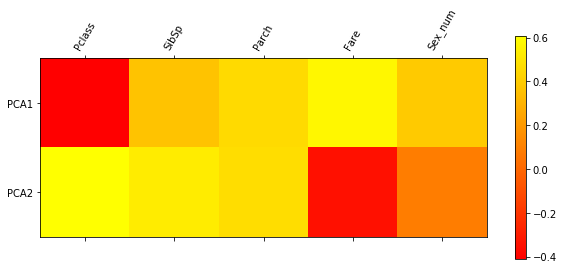

In [15]:
plt.matshow(pca.components_, interpolation='none', cmap='autumn',
            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar()
plt.xticks(range(5), x, rotation=60)
print('')

In [16]:
a=train.Embarked.copy()
b = a.value_counts().to_dict()

In [17]:
b

{'S': 644, 'C': 168, 'Q': 77}

In [18]:
l = []
s = [1,0,0]
q = [0,1,0]
c = [0,0,1]
n = [0,0,0]
for i in range(len(train)):
    if a[i] == 'S':
        l.append(s)
    elif a[i] == 'Q':
        l.append(q)
    elif a[i] == 'C':
        l.append(c)
    else:
        l.append(n)
    

In [19]:
b = pd.DataFrame(l, columns=['embarked_S','embarked_Q','embarked_C'])

In [20]:
train = pd.concat([train, b], axis=1)

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num', 'embarked_S',
       'embarked_Q', 'embarked_C'],
      dtype='object')

In [22]:
x = train.loc[:,['embarked_S','embarked_Q', 'embarked_C']]

pca.fit(x,y)
pca.components_


array([[-0.77425503,  0.15855512,  0.61269032],
       [-0.26370252,  0.79923955, -0.54007141]])

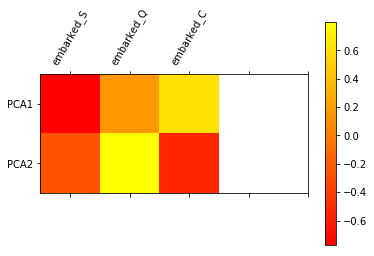

In [23]:
plt.matshow(pca.components_, interpolation='none', cmap='autumn',
            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar()
plt.xticks(range(5), x, rotation=60)
print('')

In [24]:
x = train['embarked_C']
np.corrcoef(x,y)

array([[1.        , 0.16824043],
       [0.16824043, 1.        ]])

In [25]:
train.Cabin.value_counts().to_dict()

{'B96 B98': 4,
 'C23 C25 C27': 4,
 'G6': 4,
 'C22 C26': 3,
 'E101': 3,
 'F2': 3,
 'F33': 3,
 'D': 3,
 'C52': 2,
 'D17': 2,
 'C2': 2,
 'C93': 2,
 'B20': 2,
 'C83': 2,
 'D20': 2,
 'E67': 2,
 'F G73': 2,
 'B18': 2,
 'E33': 2,
 'E44': 2,
 'C125': 2,
 'B51 B53 B55': 2,
 'B58 B60': 2,
 'E24': 2,
 'B22': 2,
 'D33': 2,
 'C123': 2,
 'C78': 2,
 'C68': 2,
 'B57 B59 B63 B66': 2,
 'D35': 2,
 'B28': 2,
 'B77': 2,
 'C126': 2,
 'E8': 2,
 'C65': 2,
 'F4': 2,
 'E121': 2,
 'B5': 2,
 'B35': 2,
 'E25': 2,
 'D36': 2,
 'B49': 2,
 'D26': 2,
 'C124': 2,
 'C92': 2,
 'C90': 1,
 'B71': 1,
 'A34': 1,
 'E31': 1,
 'E58': 1,
 'C70': 1,
 'E34': 1,
 'D15': 1,
 'C47': 1,
 'C95': 1,
 'E49': 1,
 'A19': 1,
 'B19': 1,
 'C87': 1,
 'A10': 1,
 'B73': 1,
 'C62 C64': 1,
 'C148': 1,
 'C54': 1,
 'D46': 1,
 'B94': 1,
 'C101': 1,
 'C50': 1,
 'B41': 1,
 'D7': 1,
 'A31': 1,
 'A23': 1,
 'B38': 1,
 'D56': 1,
 'C128': 1,
 'E50': 1,
 'E40': 1,
 'D6': 1,
 'F G63': 1,
 'C49': 1,
 'E63': 1,
 'B42': 1,
 'A36': 1,
 'D28': 1,
 'B4': 1,
 'E17': 

In [26]:
a = train.Cabin.copy()

In [27]:
a = a.fillna(0)

In [28]:
l1=[]
l2=[]
for i in range(len(train.Cabin)):
    if type(a[i]) == str:
        l1.append(a[i][0])
        l2.append(a[i][1:])
    elif type(a[i]) == int:
        l1.append(0)
        l2.append(0)


In [29]:
# 가정 : 알파벳이 선실의 구역을 뜻하는 거라면, 구역이 생존자 수와 관련 있을까?
np.unique(l1)


array(['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype='<U11')

In [30]:
v = pd.DataFrame(l1, columns=['cabinloc']).astype(str)
y = pd.DataFrame(y)

vy = pd.concat([v,y], axis=1)

In [31]:
# 아래는
# cabinloc 에서 0이 아닌 값(=각 알파벳을 value로 갖고 있는 값.) 과 y column에서 1(='생존자'임를 의미)
# 동시에 충족하는 idx를 구하는 과정. (idx는 승객id가 될 것이다.)
b = []
c = []
for i in range(len(train)):
    if vy.cabinloc[i] != '0' and vy.Survived[i] == 1:
        b.append(i)
    elif vy.cabinloc[i] == '0' and vy.Survived[i] ==1:
        c.append(i)
        

In [32]:
len(c)

206

In [33]:
# 선실을 사용한 승객 중에 생존한 사람 수
print("총 생존자:", 342)
print('총 사망자:', len(train)-342)
print("선실 사용한 사람:", 204)
print("선실 사용하지 않은 사람:", len(train)-204)
print("선실 사용한 생존자:",len(b))
print("선실 사용한 사망자:",204 - len(b))
print("선실 사용하지 않은 생존자:", len(c))
print('선실 사용하지 않은 사망자:', 687- len(c))

총 생존자: 342
총 사망자: 549
선실 사용한 사람: 204
선실 사용하지 않은 사람: 687
선실 사용한 생존자: 136
선실 사용한 사망자: 68
선실 사용하지 않은 생존자: 206
선실 사용하지 않은 사망자: 481


In [34]:
#선실 사용한 사람 중에 생존자, 선실사용하지 않은 사람 중에 생존자 비즁
print(136/204, 206/687)

# 중간결과 : 생존자 중에 선실 사용자가 많다. 

0.6666666666666666 0.29985443959243085


In [35]:
# 선실을 사용한 승객 수
train.Cabin.value_counts().sum()

204

In [36]:
np.unique(l1)
canbin = ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [37]:
#선실 구역과 생존자 수의 관계
c=[]
b=[]
d=[]
e=[]
a=[]
f=[]
g=[]
t=[]
for i in range(len(train)):
    if vy.cabinloc[i] == 'C' and vy.Survived[i] == 1:
        c.append(i)
    elif vy.cabinloc[i] == 'B' and vy.Survived[i] ==1:
        b.append(i)
    elif vy.cabinloc[i] == 'D' and vy.Survived[i] ==1:
        d.append(i)
    elif vy.cabinloc[i] == 'E' and vy.Survived[i] ==1:
        e.append(i)
    elif vy.cabinloc[i] == 'A' and vy.Survived[i] ==1:
        a.append(i)
    elif vy.cabinloc[i] == 'F' and vy.Survived[i] ==1:
        f.append(i)
    elif vy.cabinloc[i] == 'G' and vy.Survived[i] ==1:
        g.append(i)
    elif vy.cabinloc[i] == 'T' and vy.Survived[i] ==1:
        t.append(i)

In [38]:
print("c",len(c))
print("b",len(b))
print("d",len(d))
print("e",len(e))
print("f",len(f))
print("g",len(g))
print("a",len(a))
print("t",len(t))

c 35
b 35
d 25
e 24
f 8
g 2
a 7
t 0


In [39]:
vy.iloc[:,0].value_counts().to_dict()

{'0': 687,
 'C': 59,
 'B': 47,
 'D': 33,
 'E': 32,
 'A': 15,
 'F': 13,
 'G': 4,
 'T': 1}

In [40]:
print("c/C",35/59)
print("b/B",35/47)
print("d/D",25/33)
print("e/E",24/32)
print("a/A",7/15)
print("f/F",8/13)
print("g/G",2/4)
print("t/T",0/1)

c/C 0.5932203389830508
b/B 0.7446808510638298
d/D 0.7575757575757576
e/E 0.75
a/A 0.4666666666666667
f/F 0.6153846153846154
g/G 0.5
t/T 0.0


In [41]:
# 중간 결과 B,D,E의 선실 사용자가 75%정도 생존했다. 
# 선실 구역마다 생존 비율이 조금씩 차이가 있다.
# 생존자 중에 선실 사용자의 비율은 60%가량 되는데, A,T,G 구역이 60%보다 낮아서 다른 구역보다
# 생존에 영향을 미치는 정도가 낮다.
# T,G는 이상치. 선실 갯수가 너무 적다.

# 구역과 생존에 관계가 있다.


In [42]:
#선실 구역과 생존자 수의 관계
c=[]
b=[]
d=[]
e=[]
a=[]
f=[]
g=[]
t=[]

for i in range(len(train)):
    if vy.cabinloc[i] == 'C':
        c.append(1)
    elif vy.cabinloc[i] != 'C':
        c.append(0)
    if vy.cabinloc[i] == 'B': 
        b.append(1)
    elif vy.cabinloc[i] != 'B': 
        b.append(0)    
    if vy.cabinloc[i] == 'D': 
        d.append(1)
    elif vy.cabinloc[i] != 'D': 
        d.append(0)        
    if vy.cabinloc[i] == 'E':
        e.append(1)
    elif vy.cabinloc[i] != 'E':
        e.append(0)
    if vy.cabinloc[i] == 'A':
        a.append(1)
    elif vy.cabinloc[i] != 'A':
        a.append(0)
    if vy.cabinloc[i] == 'F':
        f.append(1)
    elif vy.cabinloc[i] != 'F':
        f.append(0)
    if vy.cabinloc[i] == 'G':
        g.append(1)
    elif vy.cabinloc[i] != 'G':
        g.append(0)
    if vy.cabinloc[i] == 'T':
        t.append(1)
    elif vy.cabinloc[i] != 'T':
        t.append(0)

In [43]:
vy.cabinloc[0]

'0'

In [44]:
sum(b)

47

In [54]:
train['cabinC'] = c
train['cabinD'] = d
train['cabinE'] = e
train['cabinB'] = b
train['cabinA'] = a
train['cabinG'] = g
train['cabinT'] = t
train['cabinF'] = f

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Sex_num        891 non-null int64
embarked_S     891 non-null int64
embarked_Q     891 non-null int64
embarked_C     891 non-null int64
cabinT         891 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 118.4+ KB


In [47]:
train.Age = train.Age.fillna(29)

In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,embarked_S,embarked_Q,embarked_C,cabinT
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208,0.352413,0.722783,0.086420,0.188552,0.001122
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429,0.477990,0.447876,0.281141,0.391372,0.033501
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#훈련 시키기.
# 테스트, 훈련 셋 나누기

from sklearn.model_selection import train_test_split


X = train.loc[:,['Pclass','Fare','Sex_num','Age',
            'SibSp', 'Parch', 'embarked_S', 'embarked_Q',
            'embarked_C', 'cabinC','cabinB','cabinE','cabinD',
            'cabinA','cabinF','cabinG','cabinT']]
y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [75]:
# 모델 정의
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(norm_X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(norm_X_train, y_train)

0.3618020299134703

In [ ]:
y_pred[:10], y[:10]

In [59]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X)
norm_X = norm.transform(X)

In [60]:
norm_X_train, norm_X_test, y_train, y_test = train_test_split(norm_X, y, random_state = 0
                                                             )


(array([[-0.07514968],
        [ 0.71152691],
        [ 0.56551237],
        [ 0.69647361],
        [ 0.08480903],
        [ 0.15208605],
        [ 0.56486686],
        [ 0.04008764],
        [ 0.51461002],
        [ 0.89138146]]),      Survived
 495         0
 648         0
 278         0
 31          1
 255         1
 298         1
 609         1
 318         1
 484         1
 367         1)

In [86]:
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression(C=90)
logr.fit(norm_X_train,y_train)
pred_y = logr.predict(norm_X_test)
logr.score(norm_X_train, y_train)

c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7889221556886228

In [87]:
logr.score(norm_X_test, y_test)

0.7937219730941704

In [130]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(1)
kn.fit(norm_X_train, y_train)

print(kn.score(norm_X_train, y_train))
print(kn.score(norm_X_test, y_test))

0.9820359281437125
0.7802690582959642


c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [156]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)
display(
tree.score(X_train, y_train), tree.score(X_test, y_test) 
)

0.844311377245509

0.820627802690583

In [136]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [267]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier(max_depth = 6,min_samples_leaf=2, min_samples_split=6,
                              n_estimators=20)
rtree.fit(X_train,y_train)
display(
rtree.score(X_train, y_train), rtree.score(X_test, y_test) 
)

c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8592814371257484

0.8295964125560538

In [283]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=10)
svc.fit(X_train,y_train)
display(
svc.score(X_train, y_train), svc.score(X_test, y_test) 
)

c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7709580838323353

0.7802690582959642